Adrian-Nichita Zloteanu  
MSCS-634  
Lab 4: Regression Analysis with Regularization Techniques

First, I will load the dataset, and explore the features, target values, and data distribution. I will also check for missing values and handle if needed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# load the dataset
diabetes = load_diabetes()

# convert to DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# display the first few rows of the DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# show missing values in the DataFrame
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [4]:
# show features and target variable
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


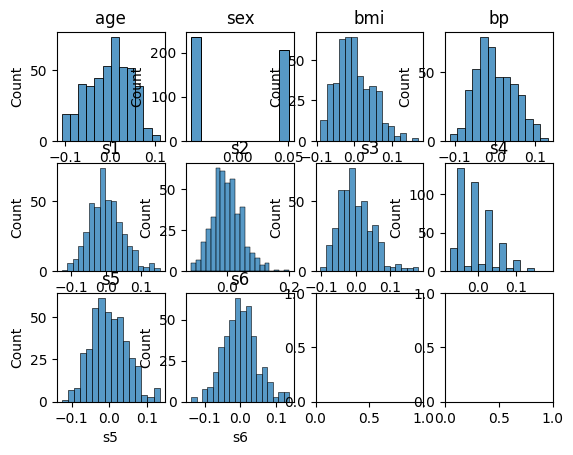

In [10]:
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()
for i, col in enumerate(diabetes.feature_names):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
plt.show()

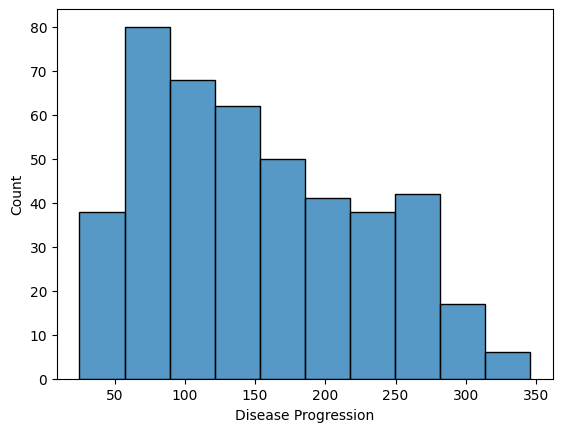

In [11]:
# vizualize target value distribution
sns.histplot(df['target'])
plt.xlabel('Disease Progression')
plt.show()

Now, I implement a Simple Linear Regression model using bmi as the independent variable:

MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


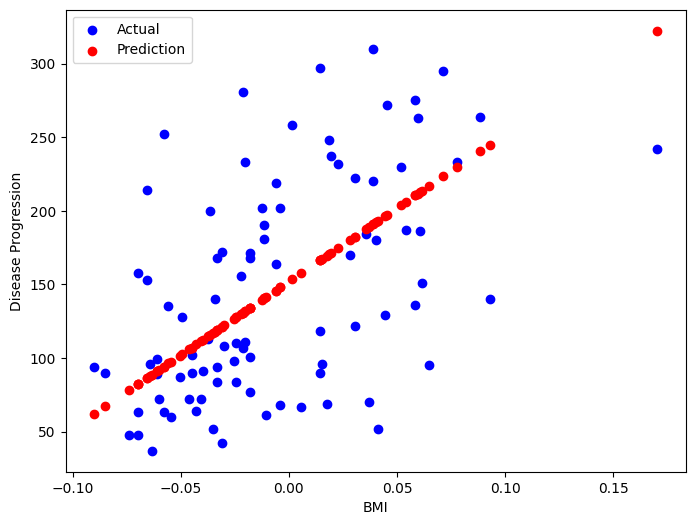

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_simple = df[['bmi']]
y = df['target']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# create and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# calculate mae, mse, rmse, and r2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')

# vizualize predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Prediction')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

Next, we will implement a multiple regression model, and evaluate its performance using MAE, MSE, RMSE, and R^2:

MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.45


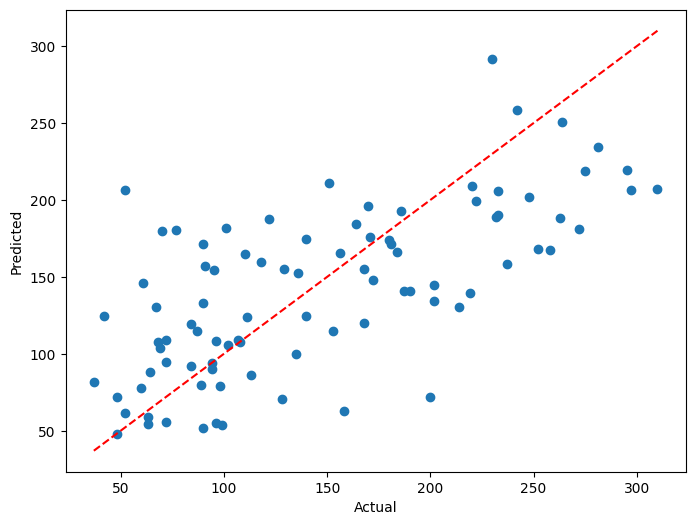

In [13]:
# Multiple Regression using all features
X_multi = df.drop('target', axis=1)
y = df['target']

# again, split the dataset into training and testing sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# create and fit the multiple linear regression model
linreg_multi = LinearRegression()
linreg_multi.fit(X_train_m, y_train_m)
y_pred_m = linreg_multi.predict(X_test_m)

# calculate mae, mse, rmse, and r2 for multiple regression
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)

print(f'MAE: {mae_m:.2f}, MSE: {mse_m:.2f}, RMSE: {rmse_m:.2f}, R²: {r2_m:.2f}')

# visualize the plot
plt.figure(figsize=(8,6))
plt.scatter(y_test_m, y_pred_m)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')
plt.show()

Next we have the polynomial regression; here we extend the previously used linear regression model with polynomial features.

MAE: 43.58, MSE: 3096.03, RMSE: 55.64, R²: 0.42


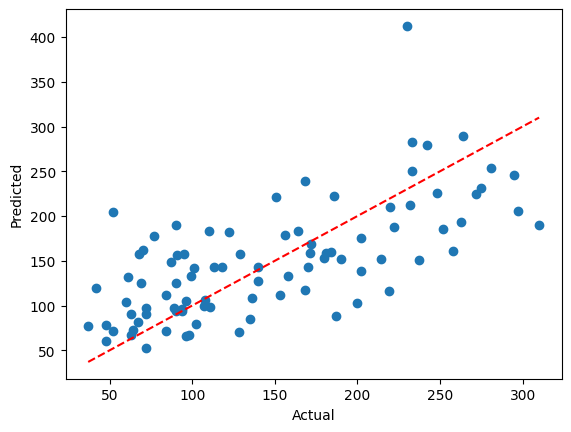

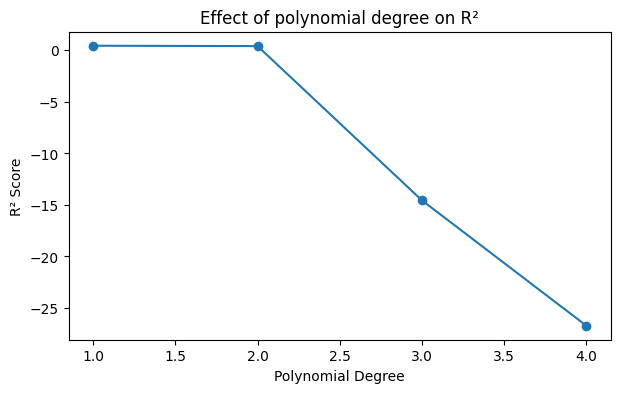

In [14]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(df.drop('target', axis=1))

y = df['target']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_p, y_train_p)
y_pred_p = linreg_poly.predict(X_test_p)

mae_p = mean_absolute_error(y_test_p, y_pred_p)
mse_p = mean_squared_error(y_test_p, y_pred_p)
rmse_p = np.sqrt(mse_p)
r2_p = r2_score(y_test_p, y_pred_p)

print(f'MAE: {mae_p:.2f}, MSE: {mse_p:.2f}, RMSE: {rmse_p:.2f}, R²: {r2_p:.2f}')

# show predicted vs actual values for polynomial
plt.scatter(y_test_p, y_pred_p)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'r--')
plt.show()

# show the effect of polynomial degree choice -> overfitting / underfitting
degrees = [1, 2, 3, 4]
r2_scores = []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(df.drop('target', axis=1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

plt.figure(figsize=(7,4))
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Effect of polynomial degree on R²')
plt.show()

Next I will implement ridge regression and lasso regression models.

The comparison between these and the earlier models can be found in the ending section. 

Ridge - MAE: 46.14, MSE: 3077.42, RMSE: 55.47, R²: 0.42
Lasso - MAE: 49.73, MSE: 3403.58, RMSE: 58.34, R²: 0.36


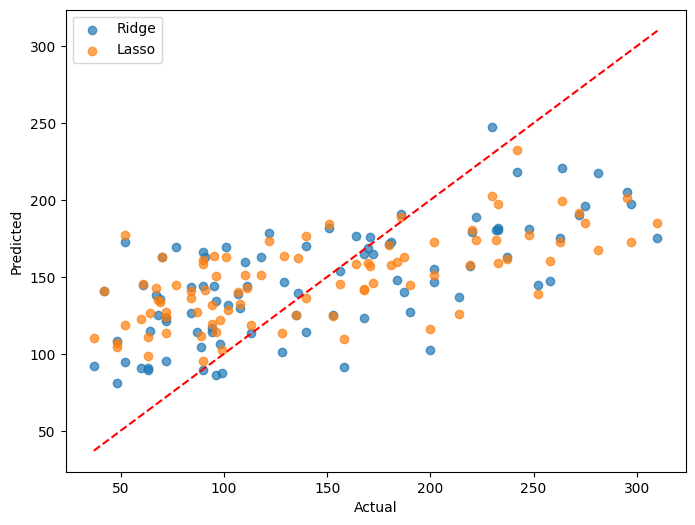

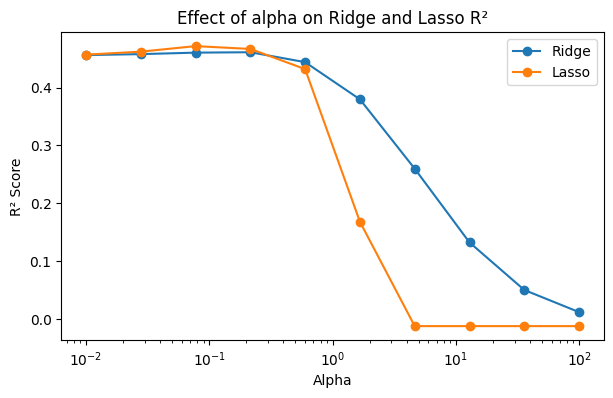

In [16]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_m, y_train_m)
y_pred_ridge = ridge.predict(X_test_m)

mae_ridge = mean_absolute_error(y_test_m, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_m, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_m, y_pred_ridge)

print(f'Ridge - MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}')

lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train_m, y_train_m)
y_pred_lasso = lasso.predict(X_test_m)

mae_lasso = mean_absolute_error(y_test_m, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_m, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_m, y_pred_lasso)

print(f'Lasso - MAE: {mae_lasso:.2f}, MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.2f}')

# visualize comparison of predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test_m, y_pred_ridge, alpha=0.7, label='Ridge')
plt.scatter(y_test_m, y_pred_lasso, alpha=0.7, label='Lasso')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')
plt.show()

# show the effect of alpha on Ridge and Lasso regression
alphas = np.logspace(-2, 2, 10)
r2_ridge_list, r2_lasso_list = [], []
for a in alphas:
    ridge = Ridge(alpha=a).fit(X_train_m, y_train_m)
    lasso = Lasso(alpha=a, max_iter=10000).fit(X_train_m, y_train_m)
    r2_ridge_list.append(ridge.score(X_test_m, y_test_m))
    r2_lasso_list.append(lasso.score(X_test_m, y_test_m))
plt.figure(figsize=(7,4))
plt.plot(alphas, r2_ridge_list, marker='o', label='Ridge')
plt.plot(alphas, r2_lasso_list, marker='o', label='Lasso')
plt.xscale('log') # x-axis in log scale
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Effect of alpha on Ridge and Lasso R²')
plt.legend()
plt.show()

The above chart shows the effect of alpha on ridge and lasso algorithms.

As the alpha value increases, both Ridge and Lasso regressions show a clear decline in performance, but in slightly different ways.
For small alpha values (below 1), both models maintain high R² scores, meaning they fit the data well. However, as alpha increases, Ridge gradually loses performance, while Lasso drops off much more sharply.

At high alpha values, Lasso’s R² score drops to nearly zero, indicating possibly underfitting the data. Ridge, on the other hand, still retains some predictive power, though its performance also degrades. 

This shows that Ridge is more robust to larger alpha values, while Lasso can become too aggressive with regularization.

With all the data present, we can summarize the models in a table:

In [45]:

results = pd.DataFrame({
    'Model': [
        'Simple Linear',
        'Multiple Linear',
        'Polynomial',
        'Ridge',
        'Lasso'
    ],
    'MAE': [mae, mae_m, mae_p, mae_ridge, mae_lasso],
    'MSE': [mse, mse_m, mse_p, mse_ridge, mse_lasso],
    'RMSE': [rmse, rmse_m, rmse_p, rmse_ridge, rmse_lasso],
    'R2': [r2, r2_m, r2_p, r2_ridge, r2_lasso]
})
results.set_index('Model', inplace=True)
display(results)

,MAE,MSE,RMSE,R2
Model,,,,
Simple Linear,52.259976,4061.825928,63.732456,0.233350
Multiple Linear,42.794095,2900.193628,53.853446,0.452603
Polynomial,43.581693,3096.028307,55.641965,0.415640
Ridge,46.138858,3077.415939,55.474462,0.419153
Lasso,49.730328,3403.575722,58.340172,0.357592


Comparison and Analysis

Looking at the results, Multiple Linear Regression gave the best performance overall. It had the lowest error values and the highest R² (0.45), so using all the features together worked best for predicting disease progression.

Simple Linear Regression, which only used BMI, did the worst. The errors were much higher, and the R² was only 0.23. This shows that BMI by itself doesn’t explain the target very well, more data points need to be accounted for.

Polynomial Regression (degree=2) didn’t help either. Its R² dropped a bit compared to multiple linear, and the errors went up slightly. So adding more complexity didn’t improve the model, and might’ve just made it overfit.

Ridge and Lasso also didn’t perform better than regular multiple linear regression. Ridge was close, with an R² of 0.42, but Lasso dropped to 0.36. Since these models are supposed to help with overfitting, this probably means the base model wasn’t overfitting much in the first place, or maybe the regularization settings weren’t ideal.

The multiple linear model handled the test set well, with no clear signs of overfitting. On the other hand, polynomial regression made the model more complex but didn’t improve accuracy — which suggests a bit of overfitting or just adding noise.

Ridge and Lasso are designed to prevent overfitting by limiting how big the coefficients can get, but in this case, they didn’t improve anything. So the regularization probably wasn’t needed here.

Dataset insights

One thing that stands out is that none of the R² values are above 0.5, which means the models can only explain part of the variation in disease progression. That could mean the data isn’t super linear, or maybe there are other important features missing.

It’s also clear that using multiple features is better than just relying on one, like BMI. Diabetes progression is influenced by several issues working together, not just a single variable.